<h1 style="font-size:4rem;color:blue;">BGS Biodigestor experiment production analysis</h1>

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])

In [3]:
df.head()

,date,hour,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test
0,2021-08-10,22:48:53,14.81,14.69,66.7,18.8,84.50,16.93,0.0,1,0
1,2021-08-10,23:33:53,14.88,14.69,78.3,18.0,84.45,15.83,0.0,1,0
2,2021-08-11,00:03:55,14.88,14.69,83.2,17.4,84.35,15.22,0.0,1,0
3,2021-08-11,00:33:55,14.88,14.69,84.8,16.7,84.15,14.58,0.0,1,0
4,2021-08-11,00:48:54,14.88,14.69,87.4,16.0,84.10,14.18,0.0,1,0


In [4]:
#overview

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44003 entries, 0 to 44002
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         44003 non-null  datetime64[ns]
 1   hour         44003 non-null  object        
 2   fluid_temp   44003 non-null  float64       
 3   ground_temp  44003 non-null  float64       
 4   air_umidity  44003 non-null  float64       
 5   air_temp     44003 non-null  float64       
 6   gas_umidity  16336 non-null  float64       
 7   gas_temp     16341 non-null  float64       
 8   dm3_gas      44003 non-null  float64       
 9   bio_id       44003 non-null  int64         
 10  phase_test   44003 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

date               0
hour               0
fluid_temp         0
ground_temp        0
air_umidity        0
air_temp           0
gas_umidity    27667
gas_temp       27662
dm3_gas            0
bio_id             0
phase_test         0
dtype: int64

missing values in i.e "gas_umidity" & "gas_temp"  columns

In [6]:
# missing values percentage-wise

round(df[df.columns[df.isnull().any()]].isnull().sum()*100/df.shape[0]).reset_index(name="Percentage")

,index,Percentage
0,gas_umidity,63.0
1,gas_temp,63.0


In [7]:
# Imputation
df['gas_umidity'] = df['gas_umidity'].fillna(df['gas_umidity'].mean())
df['gas_temp'] = df['gas_temp'].fillna(df['gas_umidity'].mean())

In [8]:
# duration of recording the data
print(f"Start date: {df['date'].min()},  End date: {df['date'].max()}")

Start date: 2021-05-01 00:00:00,  End date: 2022-07-10 00:00:00


The data was recorded between 1st-May-2021 and 10th-July-2022

Roughly 14 months of data collections

In [9]:
# different biodigesters
df['bio_id'].value_counts()

1    24556
2    19447
Name: bio_id, dtype: int64

In [10]:
#phase test variation
df['phase_test'].value_counts()

1    21750
2     9838
3     7306
0     5109
Name: phase_test, dtype: int64

In [11]:
# Gas volume overview
df['dm3_gas'].unique()

array([0.  , 0.01])

In [12]:
# Lets get the range of the each features
columns = ["fluid_temp", "ground_temp", "air_umidity", "air_temp", "gas_umidity", "gas_temp"]
for col in columns:
    print(f" {col}  Minimum Value : {df[col].min()},  Maximum Value: {df[col].max()} change_value: {df[col].max()-df[col].min()}")

 fluid_temp  Minimum Value : -127.0,  Maximum Value: 24.38 change_value: 151.38
 ground_temp  Minimum Value : -127.0,  Maximum Value: 24.94 change_value: 151.94
 air_umidity  Minimum Value : 0.0,  Maximum Value: 99.9 change_value: 99.9
 air_temp  Minimum Value : 0.0,  Maximum Value: 52.6 change_value: 52.6
 gas_umidity  Minimum Value : 31.72,  Maximum Value: 113.06 change_value: 81.34
 gas_temp  Minimum Value : -12.62,  Maximum Value: 120.79 change_value: 133.41


Fluid Temperatures and Ground temperatures had the greatest variance 

Air temperature vaiation being the least

<Axes: >

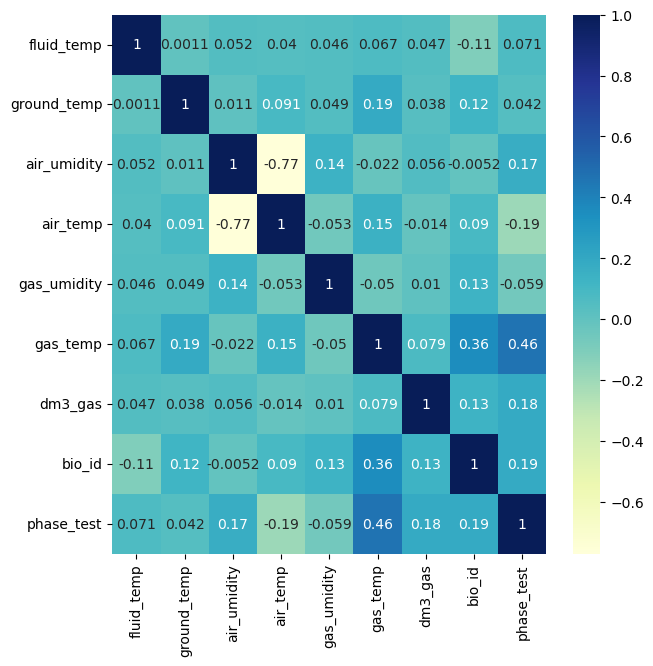

In [13]:
#Visualizing the correlation between the features 
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [14]:
# Creating month and hour columns
df['Month'] = df['date'].dt.month
df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

## Effects of air temperature and fluid temperature on biogas production?

### Visualizing hourly distribution of various features

In [15]:
hour = df.groupby("Hour").mean().reset_index()

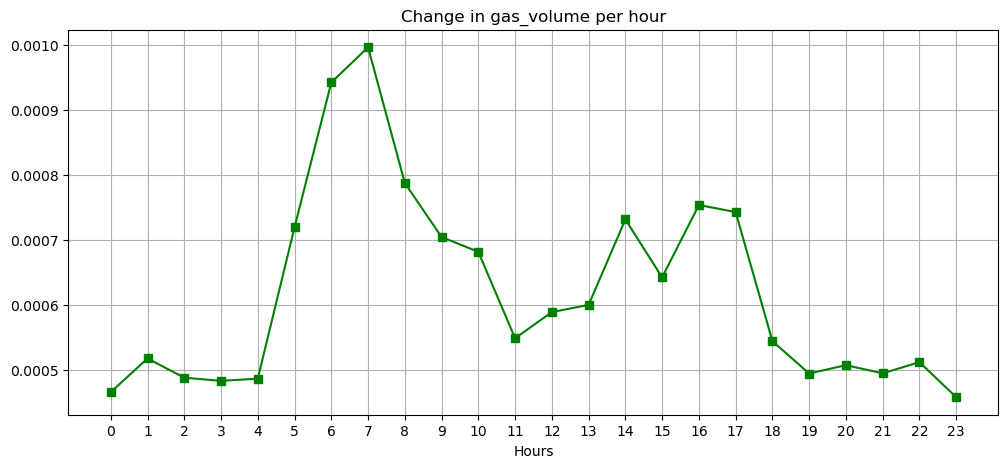

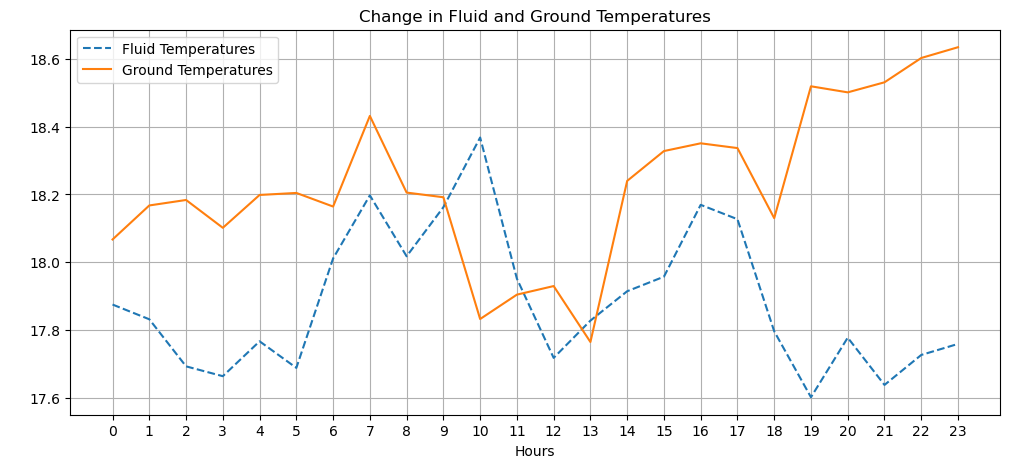

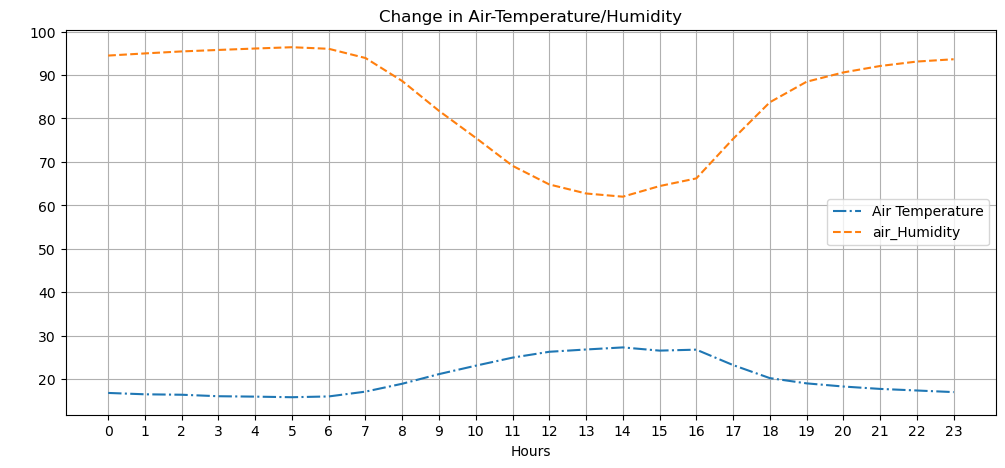

In [16]:
plt.figure(figsize=(12,5))
plt.plot(hour.Hour, hour.dm3_gas, color='green', marker='s')
plt.xticks(np.arange(0, 24, step=1))
plt.title("Change in gas_volume per hour")
plt.xlabel('Hours')
plt.grid()
plt.savefig('dn3_gas_Change.png', dpi=300)
plt.show()

# Fluid_temperatures and Ground_temperatures
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(hour['Hour'], hour['fluid_temp'], label='Fluid Temperatures', linestyle='--')
ax.plot(hour['Hour'], hour['ground_temp'], label='Ground Temperatures', linestyle='-')

# Add title and labels
ax.set_title('Change in Fluid and Ground Temperatures')
ax.set_xlabel('Hours')
ax.set_ylabel(' ')
ax.set_xticks(np.arange(0, 24, step=1))
ax.grid()
ax.legend()

# Display the plot
plt.savefig('temp.png', dpi=300)
plt.show()

# Air_Temperature and Air_Humidity
# Create a Figure and Axes
fig, ax = plt.subplots(figsize=(12,5))

# Create line plots with labels for the legend
ax.plot(hour['Hour'], hour['air_temp'], label='Air Temperature', linestyle='-.')
ax.plot(hour['Hour'], hour['air_umidity'], label='air_Humidity', linestyle='--')


# Add title and labels
ax.set_title('Change in Air-Temperature/Humidity')
ax.set_xlabel('Hours')
ax.set_ylabel(' ')
ax.set_xticks(np.arange(0, 24, step=1))
plt.grid()
# Add a legend
ax.legend()

# Display the plot
plt.savefig('temp_&_humidity.png', dpi=300)
plt.show()


- Between 4AM to 8AM there is drastic increase in the gas volume, noticably there is also increase in ground temperartures as well as fluid temperatures. 
- Meaning change in these temperatures during these hours of the day leads to change(increase) in the gas volume. 

In [17]:
# Group the dataset in according to months
month = df.groupby("Month").mean().reset_index()

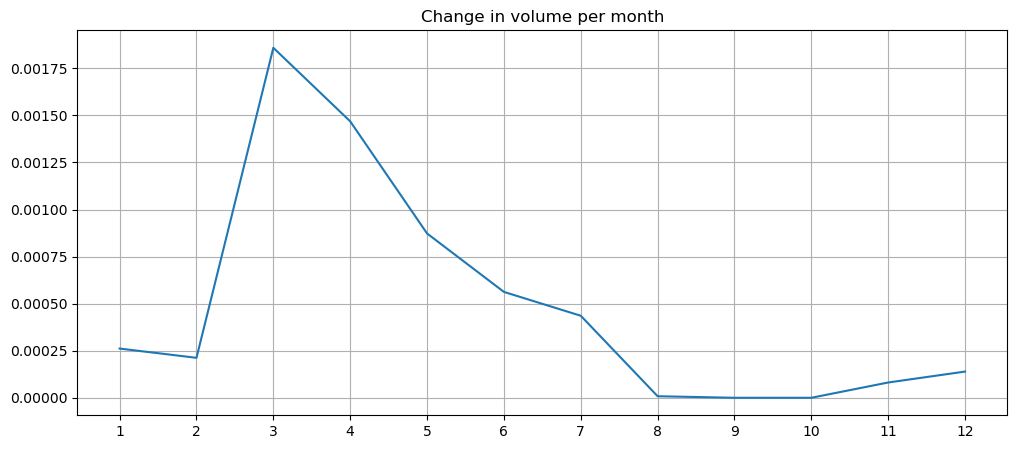

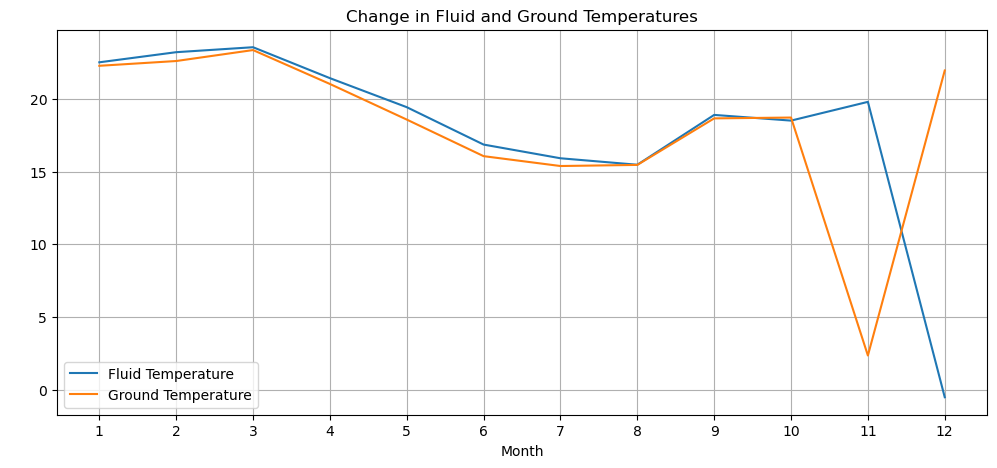

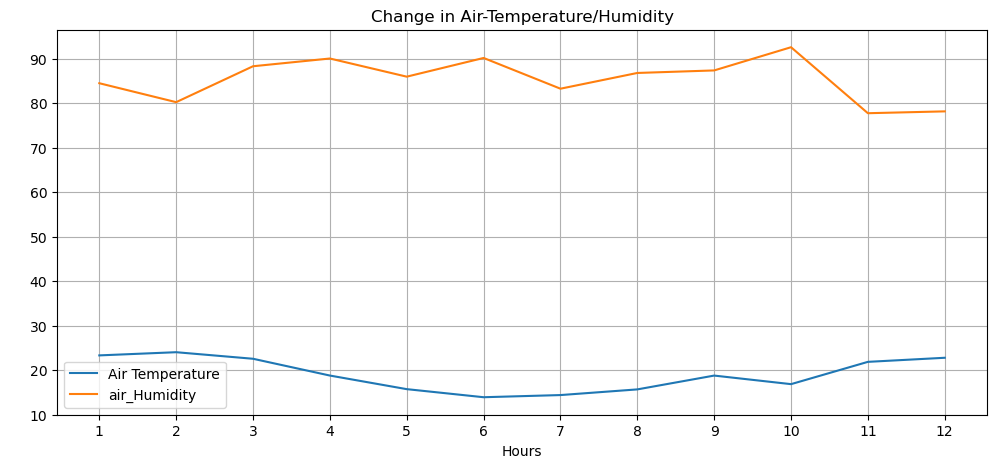

In [18]:
plt.figure(figsize=(12,5))
plt.plot(month.Month, month.dm3_gas)
plt.xticks(np.arange(1, 13, step=1))
plt.title("Change in volume per month")
plt.grid()
plt.show()

# Create a Figure and Axes
fig, ax = plt.subplots(figsize=(12,5))


ax.plot(month['Month'], month['fluid_temp'], label='Fluid Temperature')
ax.plot(month['Month'], month['ground_temp'], label='Ground Temperature')

# Add title and labels
ax.set_title('Change in Fluid and Ground Temperatures')
ax.set_xlabel('Month')
ax.set_ylabel(' ')
ax.set_xticks(np.arange(1, 13, step=1))
plt.grid()
ax.legend()

# Display the plot
plt.show()


# Create a Figure and Axes
fig, ax = plt.subplots(figsize=(12,5))

# Create line plots with labels for the legend
ax.plot(month['Month'], month['air_temp'], label='Air Temperature')
ax.plot(month['Month'], month['air_umidity'], label='air_Humidity')


# Add title and labels
ax.set_title('Change in Air-Temperature/Humidity')
ax.set_xlabel('Hours')
ax.set_ylabel(' ')
ax.set_xticks(np.arange(1, 13, step=1))
plt.grid()
# Add a legend
ax.legend()

# Display the plot
plt.show()


- In the Second month there is increase in gas volume as well as increase in air humidity during te same month
- Also persistent change in Air Temperature at the end of the year leds to a chenge in the gas volume
_ Also a decrease in Fluid and Ground Tempreratures leads to decrease in the gas volume

### What was the change in bio 1 for phase 2?

In [19]:
#filter out phase 2 entries

phase2 = df[df["phase_test"]==2]

In [20]:
phase2.head()

,date,hour,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
5109,2022-05-01,00:41:30,20.06,20.0,97.9,16.7,83.551898,83.551898,0.00,1,2,5,0
5110,2022-05-01,01:33:58,20.06,20.0,97.7,16.8,82.880000,16.390000,0.00,1,2,5,1
5111,2022-05-01,01:57:02,20.06,20.0,97.8,16.8,82.880000,16.400000,0.00,1,2,5,1
5112,2022-05-01,02:56:59,20.06,20.0,97.8,16.8,83.200000,16.470000,0.00,1,2,5,2
5113,2022-05-01,03:11:59,20.06,20.0,97.8,16.9,83.180000,16.490000,0.01,1,2,5,3


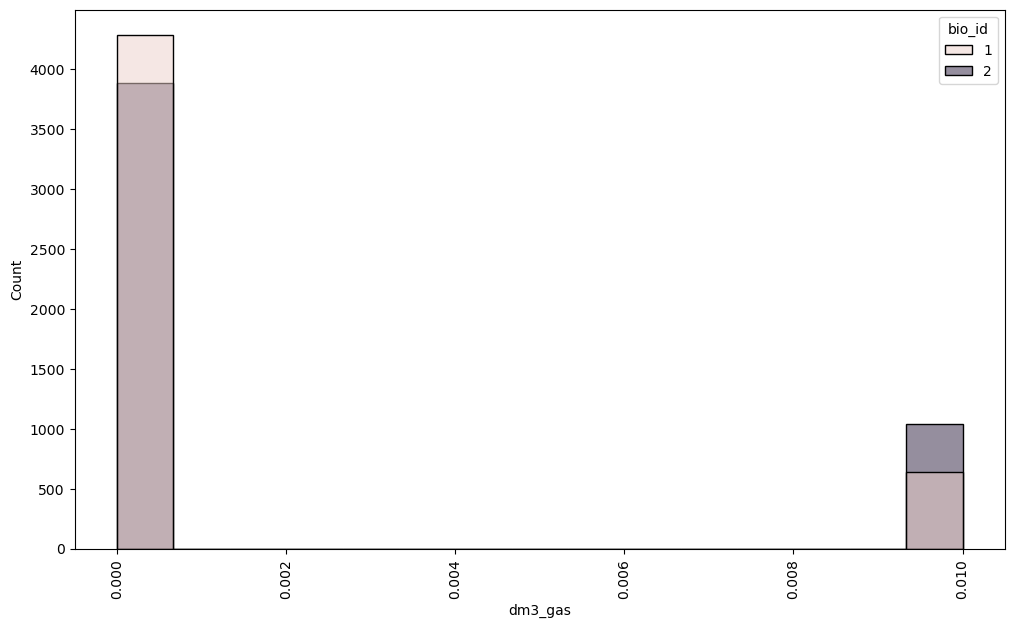

In [21]:
plt.figure(figsize=(12,7))
sns.histplot(phase2, x='dm3_gas', hue='bio_id')
plt.xticks(rotation = 90)
plt.show()

In [22]:
# Extracting only bio_1 entries from Phase 2 datsaset
phase2bio_1 = phase2[phase2['bio_id']==1]
phase2bio_1.head()

,date,hour,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
5109,2022-05-01,00:41:30,20.06,20.0,97.9,16.7,83.551898,83.551898,0.00,1,2,5,0
5110,2022-05-01,01:33:58,20.06,20.0,97.7,16.8,82.880000,16.390000,0.00,1,2,5,1
5111,2022-05-01,01:57:02,20.06,20.0,97.8,16.8,82.880000,16.400000,0.00,1,2,5,1
5112,2022-05-01,02:56:59,20.06,20.0,97.8,16.8,83.200000,16.470000,0.00,1,2,5,2
5113,2022-05-01,03:11:59,20.06,20.0,97.8,16.9,83.180000,16.490000,0.01,1,2,5,3


#### Variation in features in Bio 2 phase 2

In [23]:
# Extracting only bio_2 entries from Phase 2 datsaset
phase2bio_2 = phase2[phase2['bio_id']==2]

columns = ["fluid_temp", "ground_temp", "air_umidity", "air_temp", "gas_umidity", "gas_temp"]
print("Change in Bio 2 phase 2")
print(" ")
for col in columns:
    print(" ")
    print(f" {col}  Minimum Value : {phase2bio_2[col].min()},  Maximum Value: {phase2bio_2[col].max()} change_value: {(phase2bio_2[col].max()-phase2bio_2[col].min())}")

Change in Bio 2 phase 2
 
 
 fluid_temp  Minimum Value : 22.04,  Maximum Value: 24.12 change_value: 2.080000000000002
 
 ground_temp  Minimum Value : 19.5,  Maximum Value: 23.06 change_value: 3.5599999999999987
 
 air_umidity  Minimum Value : 40.0,  Maximum Value: 99.9 change_value: 59.900000000000006
 
 air_temp  Minimum Value : 7.6,  Maximum Value: 37.7 change_value: 30.1
 
 gas_umidity  Minimum Value : 83.55189826150833,  Maximum Value: 83.55189826150833 change_value: 0.0
 
 gas_temp  Minimum Value : 83.55189826150833,  Maximum Value: 83.55189826150833 change_value: 0.0


#### Variation in features in Bio 1 phase 2

In [24]:
# Lets get the range of the each features for bio 1 in phase 2

columns = ["fluid_temp", "ground_temp", "air_umidity", "air_temp", "gas_umidity", "gas_temp"]
print("Change in Bio 1 phase 2")
print(" ")
for col in columns:
    print(" ")
    print(f" {col}  Minimum Value : {phase2bio_1[col].min()},  Maximum Value: {phase2bio_1[col].max()} change_value: {round(phase2bio_1[col].max()-phase2bio_1[col].min())}")

Change in Bio 1 phase 2
 
 
 fluid_temp  Minimum Value : 19.12,  Maximum Value: 24.38 change_value: 5
 
 ground_temp  Minimum Value : 19.5,  Maximum Value: 24.94 change_value: 5
 
 air_umidity  Minimum Value : 40.0,  Maximum Value: 99.9 change_value: 60
 
 air_temp  Minimum Value : 7.6,  Maximum Value: 37.7 change_value: 30
 
 gas_umidity  Minimum Value : 55.13,  Maximum Value: 105.27 change_value: 50
 
 gas_temp  Minimum Value : 12.77,  Maximum Value: 83.55189826150833 change_value: 71


Notes:

    
   In Bio 1 phase 2 
   
   There was noticable change especially in Gas Humidity and Temeprature.
    
   Also in Ground Temperatures and Fluid Temperatures there was a variation between the maximum value and the minimum value but   not huge as compared to that of other features.
    
   These changes in the features were much greater than those in bio 1 phase 2 except for cases like air_humidity and air temperatures.
    

### Which boosted its production as much as bio 2?

#### Visualizing different features to capture their relativity in relation to Bio_1

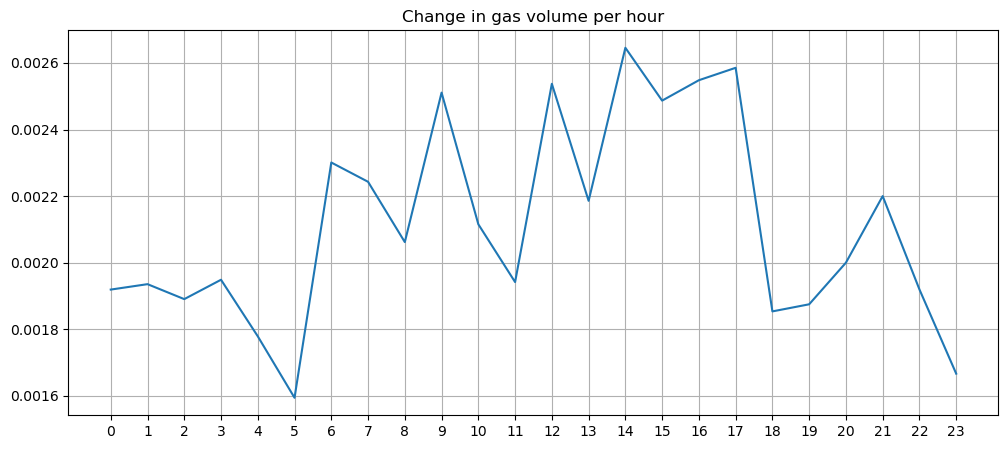

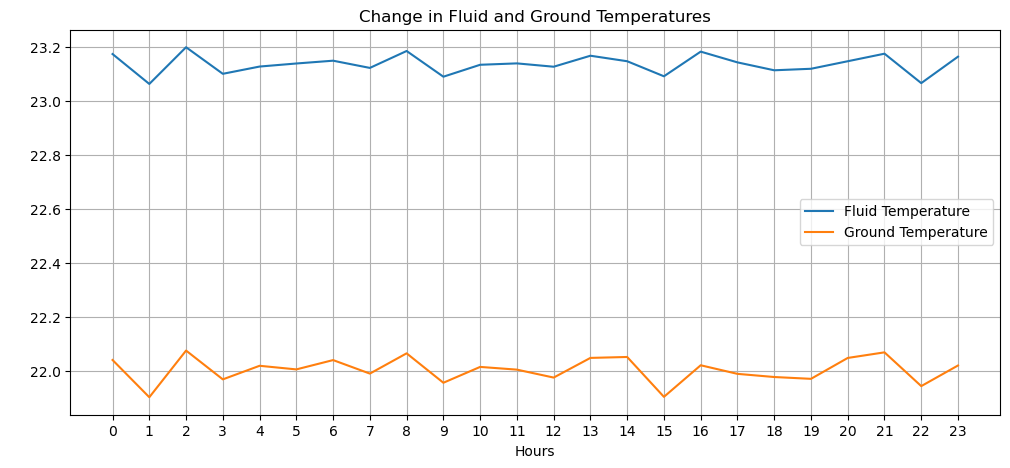

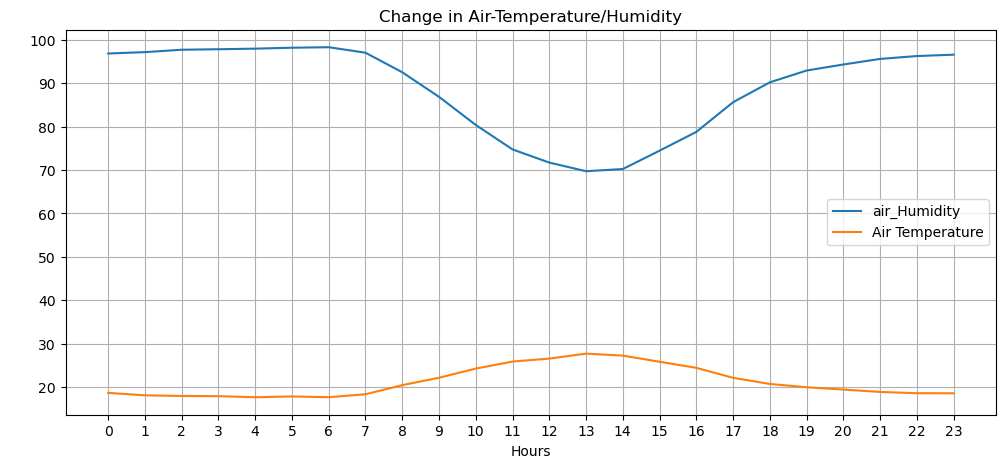

In [25]:
#grouping the dataframe
phase2bio_2_h_grouped = phase2bio_2.groupby('Hour').mean().reset_index()

plt.figure(figsize=(12,5))
plt.plot(phase2bio_2_h_grouped.Hour, phase2bio_2_h_grouped.dm3_gas)
plt.xticks(np.arange(0, 24, step=1))
plt.title("Change in gas volume per hour")
plt.grid()
plt.show()

# Create a Figure and Axes
fig, ax = plt.subplots(figsize=(12,5))


ax.plot(phase2bio_2_h_grouped['Hour'], phase2bio_2_h_grouped['fluid_temp'], label='Fluid Temperature')
ax.plot(phase2bio_2_h_grouped['Hour'], phase2bio_2_h_grouped['ground_temp'], label='Ground Temperature')


# Add title and labels
ax.set_title('Change in Fluid and Ground Temperatures')
ax.set_xlabel('Hours')
ax.set_ylabel(' ')
ax.set_xticks(np.arange(0, 24, step=1))
plt.grid()
ax.legend()

# Display the plot
plt.show()

# Air Humidity
# Create a Figure and Axes
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(phase2bio_2_h_grouped['Hour'], phase2bio_2_h_grouped['air_umidity'], label='air_Humidity')
ax.plot(phase2bio_2_h_grouped['Hour'], phase2bio_2_h_grouped['air_temp'], label='Air Temperature')

# Add title and labels
ax.set_title('Change in Air-Temperature/Humidity')
ax.set_xlabel('Hours')
ax.set_ylabel(' ')
ax.set_xticks(np.arange(0, 24, step=1))
plt.grid()

# Add a legend
ax.legend()

# Display the plot
plt.show()


 - Change/Decrease in air humidity showed a relative increase in the volume of the gas
 - Change in air temperature also has an effect on the gas volume generated at that particular period of the day

### Is temperature the only change or something else?

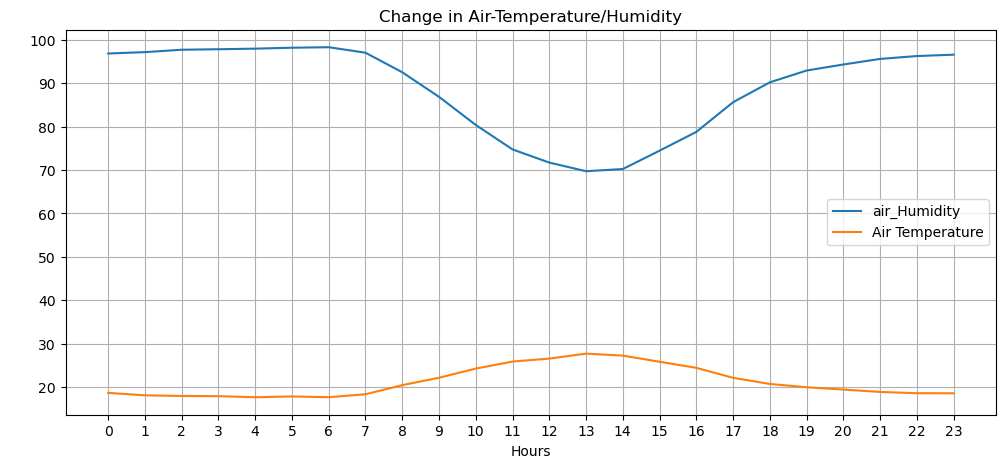

In [26]:
# Air Humidity
# Create a Figure and Axes
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(phase2bio_2_h_grouped['Hour'], phase2bio_2_h_grouped['air_umidity'], label='air_Humidity')
ax.plot(phase2bio_2_h_grouped['Hour'], phase2bio_2_h_grouped['air_temp'], label='Air Temperature')

# Add title and labels
ax.set_title('Change in Air-Temperature/Humidity')
ax.set_xlabel('Hours')
ax.set_ylabel(' ')
ax.set_xticks(np.arange(0, 24, step=1))
plt.grid()

# Add a legend
ax.legend()

# Display the plot
plt.show()


Change in humidity also exhibits impact though a negative correlation

In Conclusion:
    
    - Different factors contribute to variation in the Biogas productions affecting also the volume.
    - The features analysed have shown different impacts and also exhibited direct or indirect impacts.
    - Air Humidity and air Temperature have much impacts.
    - Also some seasons (months) have quit low gas volume production which is a point of concern where an investigation can be launched for more information. These months include 8th, 9th and 10th